In [1]:
import numpy as np

# Given data
vehicles_per_hour = np.array([1, 1, 0, 0, 0, 1, 1, 2, 4, 4, 5, 5, 6, 5, 10, 3, 4, 8, 5, 4, 3, 2, 1, 1])
total_vehicles = 76
charging_time = 6  # in hours
swap_time = 0.25  # in hours (15 mins)
num_slots = 8
operating_hours = 24

# Assumed average waiting time in the queue (in hours)
avg_waiting_time = 0.5

# Available time for charging per slot (in hours)
available_time_per_slot = operating_hours - (swap_time * len(vehicles_per_hour))

# Number of full charging cycles per slot per day
charging_cycles_per_slot = available_time_per_slot // charging_time

# Total number of batteries charged per day (across all slots)
batteries_charged_per_day = charging_cycles_per_slot * num_slots

# Since each vehicle needs a battery every 24 hours, we can calculate total batteries required
batteries_required = total_vehicles + np.sum(vehicles_per_hour * avg_waiting_time)

batteries_required, batteries_charged_per_day


(114.0, 24.0)

In [2]:
import numpy as np

# Given data
vehicles_per_hour = np.array([1, 1, 0, 0, 0, 1, 1, 2, 4, 4, 5, 5, 6, 5, 10, 3, 4, 8, 5, 4, 3, 2, 1, 1])
num_slots = 8
swap_time = 0.25  # hours per swap (15 mins)
charging_time = 6  # hours to charge a battery
service_rate_per_slot = 1 / swap_time  # vehicles per slot per hour
total_service_rate = num_slots * service_rate_per_slot  # total service capacity (vehicles/hour)

# Calculate total battery demand per day
total_daily_demand = sum(vehicles_per_hour)

# Calculate the number of batteries needed (assuming charging time constraint)
# The goal is to find the number of batteries such that there's always a charged battery ready

def batteries_required(vehicles_per_hour, charging_time, total_service_rate):
    total_batteries_in_use = 0
    batteries_in_queue = 0
    max_batteries = 0
    
    for hour, demand in enumerate(vehicles_per_hour):
        # Calculate the number of batteries needed at each hour
        if demand > total_service_rate:
            # If demand exceeds service rate, there will be a queue
            batteries_in_queue += demand - total_service_rate
        else:
            batteries_in_queue = max(0, batteries_in_queue - (total_service_rate - demand))
        
        # Add the number of batteries in use
        total_batteries_in_use += demand
        max_batteries = max(max_batteries, total_batteries_in_use + batteries_in_queue)
        
        # Account for batteries returning to availability after charging
        if hour >= charging_time:
            total_batteries_in_use -= vehicles_per_hour[hour - charging_time]
    
    return max_batteries

# Compute number of batteries required
batteries_needed = batteries_required(vehicles_per_hour, charging_time, total_service_rate)
batteries_needed


41

In [3]:
import numpy as np

# Given data
batteries_needed = 41
charging_time = 6  # hours to charge a battery

# Each charger can charge 4 batteries per day (24 / 6 hours)
batteries_per_charger_per_day = 24 / charging_time

# Calculate the number of chargers required
chargers_needed = np.ceil(batteries_needed / batteries_per_charger_per_day)
chargers_needed


11.0

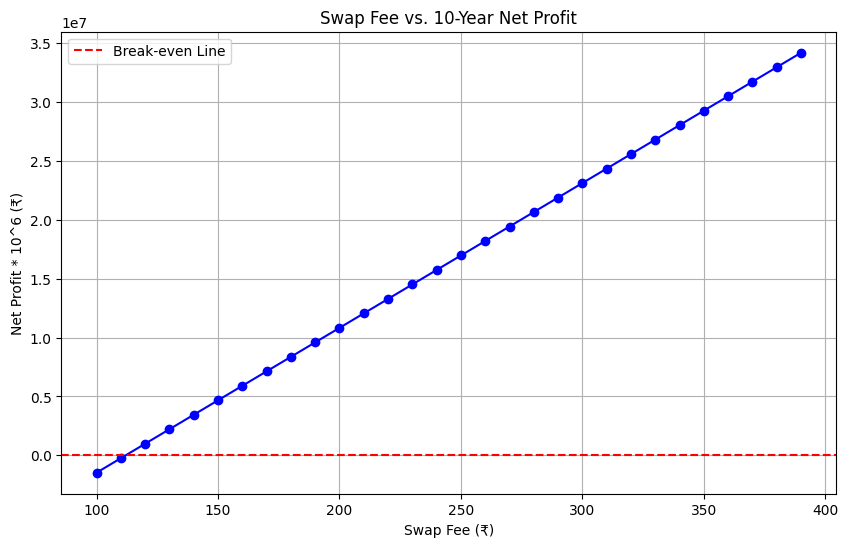

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
total_cost = 13779448  # Total 10-year cost in INR
swaps_per_year = 12300  # 41 swaps per day * 300 days
years = 10
total_swaps = swaps_per_year * years

# Swap fees range to test
swap_fees = np.arange(100, 400, 10)  # Fees from ₹100 to ₹400 in steps of ₹10
revenues = swap_fees * total_swaps  # Total revenue at each swap fee
net_profits = revenues - total_cost  # Net profit calculation

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(swap_fees, net_profits, marker='o', linestyle='-', color='b')
plt.axhline(0, color='r', linestyle='--', label='Break-even Line')
plt.title("Swap Fee vs. 10-Year Net Profit")
plt.xlabel("Swap Fee (₹)")
plt.ylabel("Net Profit * 10^6 (₹)")
plt.legend()
plt.grid(True)
plt.show()
